In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from typing import List

df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [15]:
class_labels = LabelEncoder()

df['ChestPainType'] = class_labels.fit_transform(df['ChestPainType'].values)
df['ST_Slope'] = class_labels.fit_transform(df['ST_Slope'].values)
df['RestingECG'] = class_labels.fit_transform(df['RestingECG'].values)
df['ExerciseAngina'] = class_labels.fit_transform(df['ExerciseAngina'].values)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,1,172,0,0.0,2,0
1,49,F,2,160,180,0,1,156,0,1.0,1,1
2,37,M,1,130,283,0,2,98,0,0.0,2,0
3,48,F,0,138,214,0,1,108,1,1.5,1,1
4,54,M,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,3,110,264,0,1,132,0,1.2,1,1
914,68,M,0,144,193,1,1,141,0,3.4,1,1
915,57,M,0,130,131,0,1,115,1,1.2,1,1
916,57,F,1,130,236,0,0,174,0,0.0,1,1


In [16]:
def clean_and_encode_data():
    number_coloumn = ['Age', 'Oldpeak', 'MaxHR','RestingBP', 'Cholesterol', 'FastingBS' ]
    category_coloumn = ['Sex', 'ST_Slope', 'ChestPainType','RestingECG', 'ExerciseAngina']
    for col in number_coloumn:
        df[col] = df[col].fillna(df[col].median())
    
    df1 = pd.get_dummies(df, columns=category_coloumn, drop_first=True)

    df1 = df1.replace([np.inf, -np.inf], np.nan).fillna(0)

    df1 = df1.astype(int)
    
    return df1
heart_sorted = clean_and_encode_data()
heart_sorted.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ST_Slope_1,ST_Slope_2,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_1,RestingECG_2,ExerciseAngina_1
0,40,140,289,0,172,0,0,1,0,1,1,0,0,1,0,0
1,49,160,180,0,156,1,1,0,1,0,0,1,0,1,0,0
2,37,130,283,0,98,0,0,1,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1,1,0,1,0,0,0,0,1,0,1
4,54,150,195,0,122,0,0,1,0,1,0,1,0,1,0,0
5,39,120,339,0,170,0,0,1,0,1,0,1,0,1,0,0
6,45,130,237,0,170,0,0,0,0,1,1,0,0,1,0,0
7,54,110,208,0,142,0,0,1,0,1,1,0,0,1,0,0
8,37,140,207,0,130,1,1,1,1,0,0,0,0,1,0,1
9,48,120,284,0,120,0,0,0,0,1,1,0,0,1,0,0


In [18]:
positive_heart = ((heart_sorted["HeartDisease"] == 1).sum()).item()
normal_heart = ((heart_sorted["HeartDisease"] == 0).sum()).item()
Info = [positive_heart, normal_heart]
dfmajor = pd.DataFrame(Info, index=['Positive', 'Normal'], columns=['Positive vs Normal'])

array([<Axes: ylabel='Positive vs Normal'>], dtype=object)

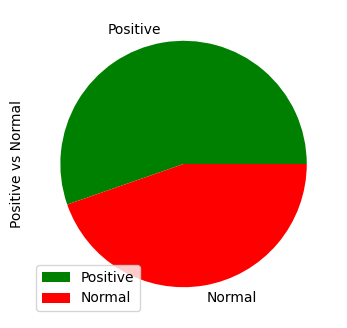

In [19]:
dfmajor.plot(kind='pie', subplots=True, figsize=(10,4), colors = ("green","red"))

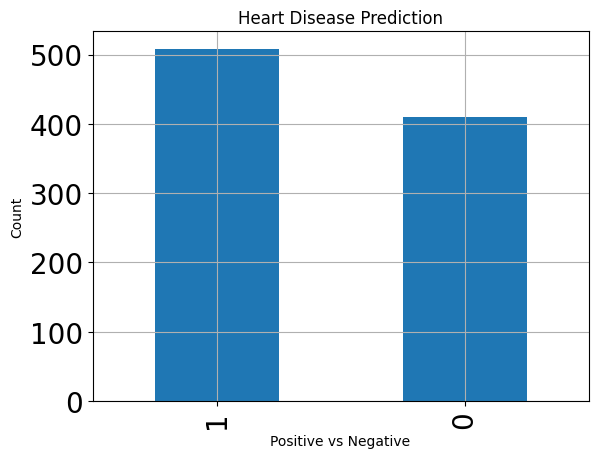

In [ ]:
embarked_count= df["HeartDisease"].value_counts()

embarked_count.plot(kind="bar")
plt.xlabel('Positive vs Negative')
plt.ylabel('Count')
plt.title('Heart Disease Prediction')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()